In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
df=pd.read_csv('Salaries.csv')
df

C:\Users\zeina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [105]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [107]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


# Data Cleaning

In [108]:
columns_to_convert = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Status']

# Using pd.to_numeric() with errors='coerce'
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [109]:
null_counts = df.isnull().sum()
null_counts

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [110]:
#no of rows
len(df)

148654

In [111]:
#drop status and notes
df.drop(['Status','Notes'], axis=1,inplace=True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [112]:
#drop Not provided data 
df = df[df['EmployeeName'] != 'Not provided']
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco


In [113]:
#To check
employee_count = df['EmployeeName'].value_counts().get('Not provided', 0)
employee_count

0

In [114]:
#drop with no Base Pay
df = df[df['BasePay'] != 0.0]
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148613,148614,Nanette M Lloyd,Special Nurse,19.97,0.00,0.00,4.30,19.97,24.27,2014,San Francisco
148616,148617,Afakasi O Afakasi,Public Service Trainee,21.48,0.00,0.86,0.22,22.34,22.56,2014,San Francisco
148617,148618,Charles F Williams Iii,Pool Lifeguard,17.26,0.00,0.00,4.04,17.26,21.30,2014,San Francisco
148619,148620,Ian V Cameron,IS Program Analyst-Assistant,6.04,0.00,10.05,2.30,16.09,18.39,2014,San Francisco


In [115]:
df['Benefits'] = df['Benefits'].fillna(0.00)
df['OtherPay'] = df['OtherPay'].fillna(0.00)
df['OvertimePay'] = df['OvertimePay'].fillna(0.00)
df['BasePay'] = df['BasePay'].fillna(0.00)

df.isnull().sum()

C:\Users\zeina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\zeina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\zeina\AppData\Local\Packages\PythonSof

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

## Exploratory Data Analysis

In [116]:
#Average base pay
df['BasePay'].mean()

66637.37902159455

In [117]:
#Highest amount of an overpay
df['OvertimePay'].max()

245131.88

In [118]:
#Retrive job title of PATRICK GARDNER for ex
df[df['EmployeeName']=='PATRICK GARDNER']['JobTitle'].iloc[0]


'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)'

In [119]:
#How much PATRICK GARDNER makes 
df[df['EmployeeName']=='PATRICK GARDNER']['TotalPayBenefits'].iloc[0]


326373.19

In [120]:
#Highest paid employee name
df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()]['EmployeeName'].iloc[0]


'NATHANIEL FORD'

In [121]:
#Lowest paid employee info
df[df['TotalPayBenefits']==df['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
110530,110531,David P Kucia,Police Officer 3,0.0,0.0,0.0,-33.89,0.0,-33.89,2013,San Francisco


In [122]:
#Get all the Debitors
Debitors_df = df[(df['TotalPayBenefits'] < 0)]
Debitors_df 

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
110528,110529,Timothy E Gibson,Police Officer 3,0.0,0.0,0.0,-2.73,0.0,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,0.0,0.0,0.0,-8.20,0.0,-8.20,2013,San Francisco
110530,110531,David P Kucia,Police Officer 3,0.0,0.0,0.0,-33.89,0.0,-33.89,2013,San Francisco


In [123]:
#average of basepay of all employees per year (2011-2014)
df.groupby('Year')['BasePay'].mean()

Year
2011    64400.991170
2012    66192.564093
2013    68509.832156
2014    67316.721920
Name: BasePay, dtype: float64

In [124]:
#No of unique jobs
print(df['JobTitle'].nunique(),df['JobTitle'].unique())

2152 ['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Marina Associate Manager' 'Sr Cnselor, Juv Hall (SFERS)'
 'Forensic Toxicologist Supervis']


In [85]:
#Top 5 most common jobs
df['JobTitle'].value_counts().head(5).index

Index(['Transit Operator', 'Special Nurse', 'Registered Nurse',
       'Public Svc Aide-Public Works', 'Custodian'],
      dtype='object')

In [86]:
#no of unique job titles in 2013
(df[df['Year']==2013]['JobTitle'].value_counts()==1).sum()

202

In [87]:
def ischief(string):
    if 'chief' in (string.lower()):
        
        return True
    else:
        return False
            

In [88]:
#How many people have the word chief in their job title

df['JobTitle'].apply(lambda x: ischief(x)).sum()

620

In [89]:
#Is there a correleation between length and job title length and salary?
df['ntitles']=df['JobTitle'].apply(len)
df['ntitles']

C:\Users\zeina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         46
1         31
2         31
3         36
4         44
          ..
148613    13
148616    22
148617    14
148619    28
148620    17
Name: ntitles, Length: 147352, dtype: int64

In [90]:
df[['ntitles','TotalPayBenefits']].corr()

,ntitles,TotalPayBenefits
ntitles,1.00000,-0.03807
TotalPayBenefits,-0.03807,1.00000


## Data Visualization

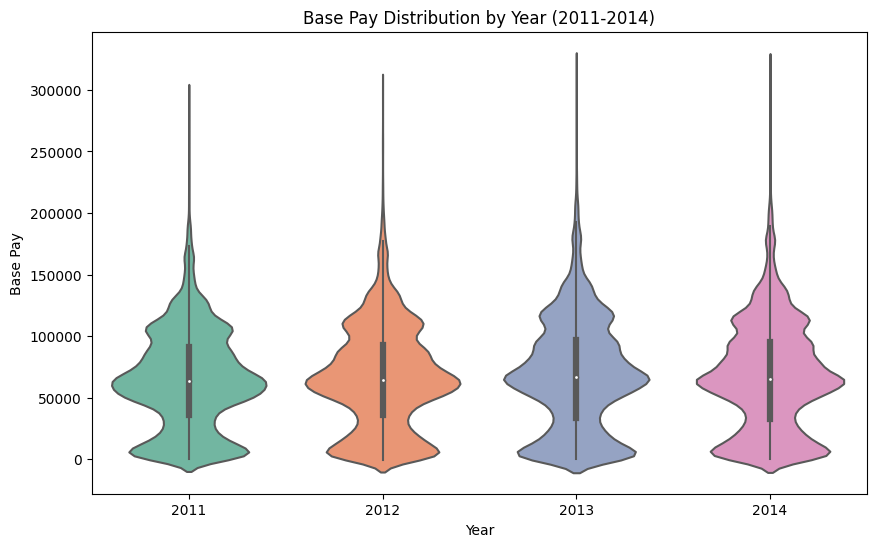

In [157]:
filtered_df = df[df['Year'].between(2011, 2014)]
# Create a violin plot with 'Year' on the x-axis and 'BasePay' on the y-axis using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x='Year', y='BasePay', palette='Set2')
plt.xlabel('Year')
plt.ylabel('Base Pay')
plt.title('Base Pay Distribution by Year (2011-2014)')
plt.show()



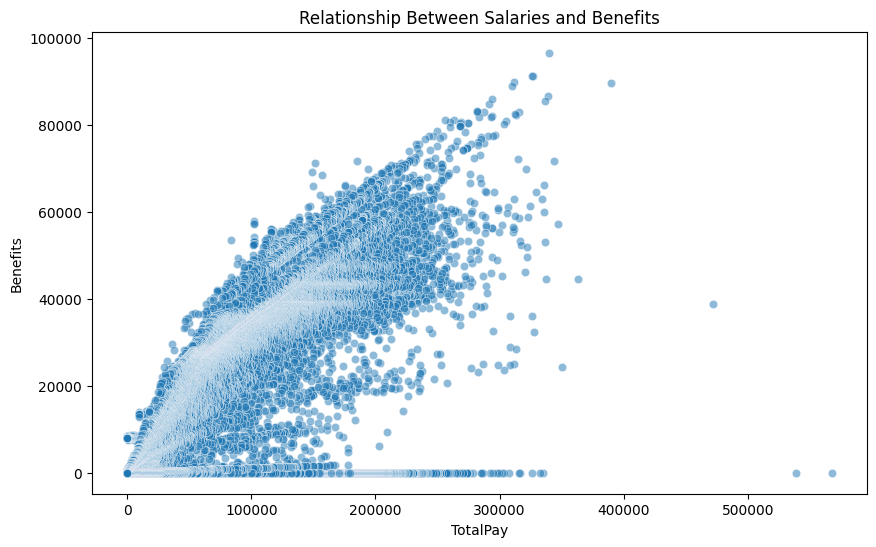

In [159]:
# Create a scatter plot to visualize the relationship between salaries and benefits
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPay', y='Benefits', alpha=0.5)
plt.xlabel('TotalPay')
plt.ylabel('Benefits')
plt.title('Relationship Between Salaries and Benefits')
plt.show()

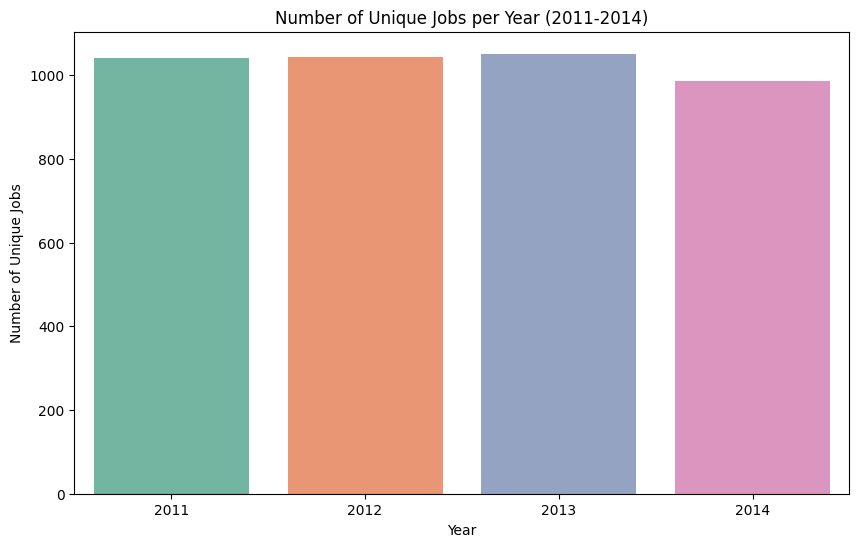

In [162]:
# Create a bar plot to visualize the number of unique jobs per year
filtered_df = df[df['Year'].between(2011, 2014)]
unique_jobs_per_year = filtered_df.groupby('Year')['JobTitle'].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_jobs_per_year, x='Year', y='JobTitle', palette='Set2')
plt.xlabel('Year')
plt.ylabel('Number of Unique Jobs')
plt.title('Number of Unique Jobs per Year (2011-2014)')
plt.show()

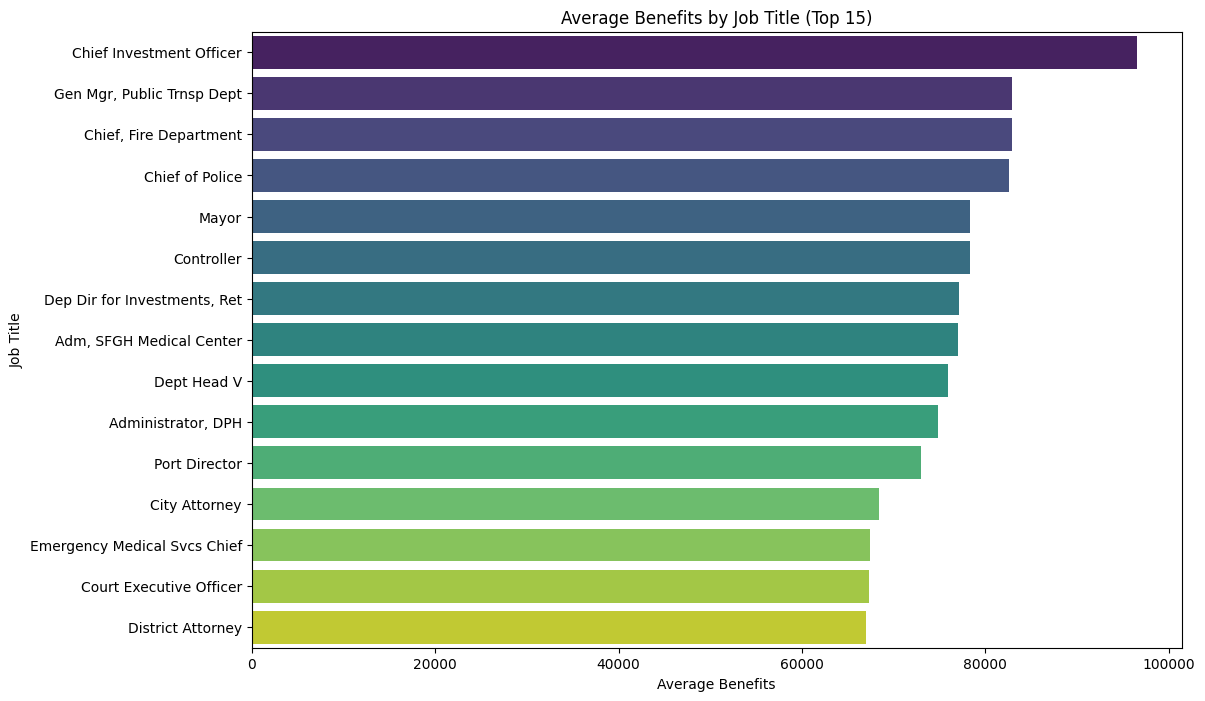

In [163]:
average_benefits_by_job = df.groupby('JobTitle')['Benefits'].mean().reset_index()

# Sort the data by average benefits in descending order for better visualization
average_benefits_by_job = average_benefits_by_job.sort_values(by='Benefits', ascending=False)

# Create a bar plot to visualize the relationship between job titles and average benefits
plt.figure(figsize=(12, 8))
sns.barplot(data=average_benefits_by_job.head(15), x='Benefits', y='JobTitle', palette='viridis')
plt.xlabel('Average Benefits')
plt.ylabel('Job Title')
plt.title('Average Benefits by Job Title (Top 15)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()